In [1]:
import torch
torch.__version__

'2.8.0+cu128'

# Qué es un tensor?

Estructura de datos que generaliza los conceptos de escalares, vectores y matrices. Puede describirse como un arreglo multidimensional de números que puede tener diferentes dimensiones (llamadas rangos). Los tensores son fundamentales en el aprendizaje automático y matemáticas, especialmente en bibliotecas como TensorFlow.

## Analogía con la vida real

- Un **escalar** es un cajón vacío (un solo número).
- Un **vector** es una fila de cajones en una dimensión (una lista de números).
- Una **matriz** es como una estantería con filas y columnas de cajones (una tabla de números).
- Un **tensor** es un armario con múltiples niveles y dimensiones: puedes tener un cajón en un piso, un estante, o en cualquier parte del armario.

## Ejemplos de tensores

- Una imagen en blanco y negro se representa como un **tensor 2D** (pixeles: filas x columnas).
- Una imagen a color se representa como un **tensor 3D** (filas x columnas x canales RGB).
TensorFlow utiliza estos tensores para realizar cálculos matemáticos optimizados.

# Tabla de contenido
- ## 1 - Crear Tensores
- ## 2 - Rango/Dimension de los Tensores
- ## 3 - Tamaño de un Tensor
- ## 4 - Cambiando dimension de un Tensor
- ## 5 - Slicing de Tensors


# 1 - Crear Tensors

In [2]:
number = torch.tensor(324, dtype=torch.int32)
floating = torch.tensor(3.567, dtype=torch.float32)

print(f"Integer tensor: {number}, dtype: {number.dtype}")
print(f"Floating tensor: {floating}, dtype: {floating.dtype}")

Integer tensor: 324, dtype: torch.int32
Floating tensor: 3.566999912261963, dtype: torch.float32


# 2 - Rank/Dimension de Tensors

El rango ***NO*** hace referencia al numero de elementos del tensor, sino que al tipo de elementos internos.

- Un **tensor escalar** tiene rango 0.
- Un **tensor vector** tiene rango 1.
- Una **matriz** tiene rango 2.

**Para rangos mayores se toma en cuenta en cuenta el *número de niveles de anidación* (visualmente observar el cambio de colores de corchetes), no el número de elementos.

## Determinar ndim3 y ndim4

- En rank3 tiene un DOS niveles de anidacion, por lo que su rango superior de 3.
- En rank4 tiene un TRES niveles de anidacion, por lo que su rango superior de 4.
- En rank4_v2 tiene un TRES niveles de anidacion, por lo que su rango superior de 4. Aquí puede llegar a ser confuso porque tenemos 4 elementos principales, sin embargo, para calcular rangos superiores solo necesitamos los NIVELES DE ANIDACION.

In [3]:
rank0_tensor = torch.tensor(3)
rank1_tensor = torch.tensor([3])
rank2_tensor = torch.tensor([
    [1, 2], 
    [3, 4]
])
rank2_tensor_v2 = torch.tensor([
    [1, 2], 
    [4, 5], 
    [7, 8]
])
rank3_tensor = torch.tensor([
    [[1, 2, 3], [4, 5, 6]],
    [[7, 8, 9], [10, 11, 12]]
])
rank4_tensor = torch.tensor([
    [[[1], [3]], [[5], [7]]],
    [[[2], [4]], [[6], [8]]]
])
rank4_tensor_v2 = torch.tensor([
    [[[1], [5]], [[9], [13]]],
    [[[2], [6]], [[10], [14]]],
    [[[3], [7]], [[11], [15]]],
    [[[4], [8]], [[12], [16]]]
])

In [4]:
print(f'Tensor ejemplo 1: {rank0_tensor.ndim}')
print(f'Tensor ejemplo 2: {rank1_tensor.ndim}')
print(f'Tensor ejemplo 3: {rank2_tensor.ndim}')
print(f'Tensor ejemplo 4: {rank2_tensor_v2.ndim}')
print(f'Tensor ejemplo 5: {rank3_tensor.ndim}')
print(f'Tensor ejemplo 6: {rank4_tensor.ndim}')
print(f'Tensor ejemplo 7: {rank4_tensor_v2.ndim}')

Tensor ejemplo 1: 0
Tensor ejemplo 2: 1
Tensor ejemplo 3: 2
Tensor ejemplo 4: 2
Tensor ejemplo 5: 3
Tensor ejemplo 6: 4
Tensor ejemplo 7: 4


# 3 - Forma de un Tensor

La forma de un tensor si hace referencia a la cantidad de elementos internos.

- Un **tensor escalar** tiene forma vacía.
- Un **tensor vector** tiene forma (1,).
- Una **matriz** tiene forma (#filas,#columnas).

Para la forma de tensores de rangos mayores se toma en cuenta en cuenta *los elementos en cada nivel de anidación partiendo del mas externo al interno* (visualmente observar el cambio de colores de corchetes)

## Determinar forma de tensores con rangos/dimensiones superiores

- En rank3 tiene 2 elementos en su primer nivel y 2 elementos en su segundo nivel y 3 elementos en su tercer nivel. (2, 2, 3)
- En rank4 tiene 2 elementos en su primer nivel y 2 elementos en su segundo nivel, 2 elementos en su tercer nivel y 1 elemento en su cuarto nivel. (2, 2, 2, 1)
- En rank4_v2 tiene 4 elementos en su primer nivel y 2 elementos en su segundo nivel, 2 elementos en su tercer nivel y 1 elemento en su cuarto nivel. (4, 2, 2, 1)

In [5]:
print(f'Tensor ejemplo 1: {rank0_tensor.shape}')
print(f'Tensor ejemplo 2: {rank1_tensor.shape}')
print(f'Tensor ejemplo 3: {rank2_tensor.shape}')
print(f'Tensor ejemplo 4: {rank2_tensor_v2.shape}')
print(f'Tensor ejemplo 5: {rank3_tensor.shape}')
print(f'Tensor ejemplo 6: {rank4_tensor.shape}')
print(f'Tensor ejemplo 7: {rank4_tensor_v2.shape}')

Tensor ejemplo 1: torch.Size([])
Tensor ejemplo 2: torch.Size([1])
Tensor ejemplo 3: torch.Size([2, 2])
Tensor ejemplo 4: torch.Size([3, 2])
Tensor ejemplo 5: torch.Size([2, 2, 3])
Tensor ejemplo 6: torch.Size([2, 2, 2, 1])
Tensor ejemplo 7: torch.Size([4, 2, 2, 1])


# 4 - Cambiando dimension de un Tensor

El numero de datos del nuevo tensor debe ser igual al tensor original.

¡¡¡No confundir el número de datos con el rango o dimensión!!!

In [6]:
# crea un arreglo de [1,2,3] tensor llenos de 1
tensor1 = torch.ones([1,2,3])
# cambiar la dimension a [2,3,1]
tensor2 = torch.reshape(tensor1, [2,3,1])
# cambiar la dimension a [1,6,1]
tensor3 = torch.reshape(tensor1, [1,6,1])
# -1 permite calcular el tamaño de la dimension en ese lugar
# this will reshape the tensor to [3,3]
tensor4 = torch.reshape(tensor2, [3, -1])

In [7]:
print(f'Tensor 1: \n{tensor1}')
print(f'Tensor 1 Forma: {tensor1.shape} y Dim: {tensor1.ndim} ')
print(f'Tensor 2: \n{tensor2}')
print(f'Tensor 2 Forma: {tensor2.shape} y Dim: {tensor2.ndim} ')
print(f'Tensor 3: \n{tensor3}')
print(f'Tensor 3 Forma: {tensor3.shape} y Dim: {tensor3.ndim} ')
print(f'Tensor 4: \n{tensor4}')
print(f'Tensor 4 Forma: {tensor4.shape} y Dim: {tensor4.ndim} ')

Tensor 1: 
tensor([[[1., 1., 1.],
         [1., 1., 1.]]])
Tensor 1 Forma: torch.Size([1, 2, 3]) y Dim: 3 
Tensor 2: 
tensor([[[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]]])
Tensor 2 Forma: torch.Size([2, 3, 1]) y Dim: 3 
Tensor 3: 
tensor([[[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]]])
Tensor 3 Forma: torch.Size([1, 6, 1]) y Dim: 3 
Tensor 4: 
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
Tensor 4 Forma: torch.Size([3, 2]) y Dim: 2 


# 5 - Slicing de Tensors

In [8]:
# Crear un tensor de 2D
matrix = [[1,2,3,4,5],
          [6,7,8,9,10],
          [11,12,13,14,15],
          [16,17,18,19,20]]

tensor = torch.tensor(matrix, dtype=torch.int32)
print(f'Rango: {tensor.ndim}')
print(f'Dimensión: {tensor.shape}')

Rango: 2
Dimensión: torch.Size([4, 5])


In [9]:
# seleccionar el 3er elementos de la primera fila
three = tensor[0,2]
print(three)

# seleccionar la primera fila
row1 = tensor[0]
print(row1)

# seleccionar los elementos de la primera columna
column1 = tensor[:, 0]
print(column1)

# selecciona la segunda fila y luego las filas de 2 en 2
row_2_and_4 = tensor[1::2]
print(row_2_and_4)

# selecciona la primera columna desde la fila 2 hasta la 4, 4 no es incluiddo
column_1_in_row_2_and_3 = tensor[1:3, 0]
print(column_1_in_row_2_and_3)

tensor(3, dtype=torch.int32)
tensor([1, 2, 3, 4, 5], dtype=torch.int32)
tensor([ 1,  6, 11, 16], dtype=torch.int32)
tensor([[ 6,  7,  8,  9, 10],
        [16, 17, 18, 19, 20]], dtype=torch.int32)
tensor([ 6, 11], dtype=torch.int32)


# Computer Vision

In [14]:
r = torch.randn(3, 224, 224)

print(f"Random tensor: {r}")
print(f"Dimension of random tensor: {r.ndim}")
print(f"Shape of random tensor: {r.shape}")

channel_red = r[0, :, :]
channel_green = r[1, :, :]
channel_blue = r[2, :, :]

print(f"Red channel: {channel_red}")
print(f"Green channel: {channel_green}")
print(f"Blue channel: {channel_blue}")
print(f"Red channel shape: {channel_red.shape}")
print(f"Green channel shape: {channel_green.shape}")
print(f"Blue channel shape: {channel_blue.shape}")


Random tensor: tensor([[[ 0.3469,  0.9728,  1.0051,  ..., -0.3470, -0.1414, -2.5561],
         [-0.6299,  0.0783, -0.8170,  ...,  0.6856,  1.0007,  1.0085],
         [-1.7424, -0.6952,  1.0722,  ..., -0.0802,  1.0445,  1.3489],
         ...,
         [-0.7832, -1.3132,  1.9058,  ..., -0.1759,  0.4159,  0.6154],
         [-1.0797, -0.5285, -0.2392,  ...,  0.0476,  0.6246, -0.8660],
         [ 0.4045, -1.0448,  0.3031,  ...,  0.4673, -1.3588,  1.1261]],

        [[-0.5571, -1.1508, -0.0747,  ...,  0.8918, -1.3530, -0.3569],
         [-0.6246,  0.6519,  0.8889,  ..., -0.0199, -0.8424,  1.1520],
         [ 0.9185,  0.4521,  0.5197,  ...,  0.9296,  0.7956, -0.7593],
         ...,
         [-0.4642,  0.1465,  0.6147,  ..., -0.5863,  0.1408,  0.5253],
         [-0.2524,  1.5448,  0.3524,  ...,  0.6587,  0.9661,  1.0255],
         [-1.0367,  2.2923, -1.7207,  ...,  0.9312, -0.2697, -0.6264]],

        [[ 0.3165,  0.6866, -1.6672,  ..., -1.0743, -1.3639, -1.1857],
         [-0.2188,  0.7849,  0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.9078283..4.4044576].


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

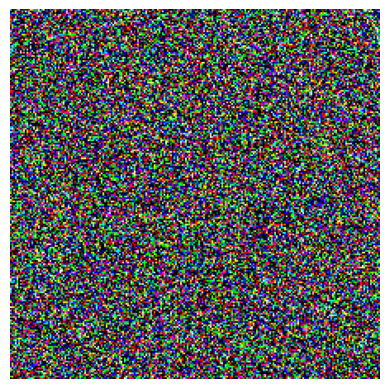

In [53]:
tensor_to_image = torch.randn(3, 224, 224)
channel_red = tensor_to_image[0, :, :].unsqueeze(0)
channel_green = tensor_to_image[1, :, :].unsqueeze(0)
channel_blue = tensor_to_image[2, :, :].unsqueeze(0)

import matplotlib.pyplot as plt
plt.imshow(channel_red.permute(1, 2, 0))
plt.imshow(tensor_to_image.permute(1, 2, 0))

plt.axis(False)